In [20]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
mab = np.array([0.55, 0.45, 0.3, 0.4, 0.35, 0.48])

In [32]:
# Greedy
def greedy(mab, n, T):
    armHist = dict()
    rewardHist = []
    # Sample all arms T times to initate armHist
    for _ in range(T):
        for i, p in enumerate(mab):
            reward = int(np.random.random() < p)
            rewardHist.append(reward)
            if i not in armHist:
                armHist[i] = [reward]
            else:
                armHist[i].append(reward)
    
    for i in range(n-T*len(mab)):
        arm = np.argmax([np.mean(i) for i in armHist.values()])
        reward = int(np.random.random() < mab[arm])
        rewardHist.append(reward)
        armHist[arm].append(reward)
    
    return rewardHist

# Epsilon Greedy
def epsilonGreedy(mab, n, T, epsilon):
    armHist = dict()
    rewardHist = []
    # Sample all arms T times to initate armHist
    for _ in range(T):
        for i, p in enumerate(mab):
            reward = int(np.random.random() < p)
            rewardHist.append(reward)
            if i not in armHist:
                armHist[i] = [reward]
            else:
                armHist[i].append(reward)
    
    for i in range(n-T*len(mab)):
        if np.random.random() < epsilon:
            arm = np.random.randint(len(mab))
        else:
            arm = np.argmax([np.mean(i) for i in armHist.values()])
        reward = int(np.random.random() < mab[arm])
        rewardHist.append(reward)
        armHist[arm].append(reward)
    
    return rewardHist

# Softmax
def softmax(mab, n, T):
    armHist = dict()
    rewardHist = []

    # Sample all arms T times to initate armHist
    for _ in range(T):
        for i, p in enumerate(mab):
            reward = int(np.random.random() < p)
            rewardHist.append(reward)
            if i not in armHist:
                armHist[i] = [reward]
            else:
                armHist[i].append(reward)
    
    softMax = lambda x: np.exp(x) / np.sum(np.exp(x))
    for i in range(n-T*len(mab)):
        arm = np.random.choice(list(armHist.keys()), p = softMax([np.mean(i) for i in armHist.values()]))
        reward = int(np.random.random() < mab[arm])
        rewardHist.append(reward)
        armHist[arm].append(reward)
    
    return rewardHist

# UCB
def ucb(mab, n, T, c):
    armHist = dict()
    rewardHist = []

    # Sample all arms T times to initate armHist
    for _ in range(T):
        for i, p in enumerate(mab):
            reward = int(np.random.random() < p)
            rewardHist.append(reward)
            if i not in armHist:
                armHist[i] = [reward]
            else:
                armHist[i].append(reward)
    
    for i in range(n-T*len(mab)):
        arm = np.argmax([np.mean(i) + c*np.sqrt(np.log(len(rewardHist)) / len(i)) for i in armHist.values()])
        reward = int(np.random.random() < mab[arm])
        rewardHist.append(reward)
        armHist[arm].append(reward)
    
    return rewardHist

# Thompson Sampling
def thompson(mab, n, T):
    armHist = dict()
    rewardHist = []

    # Sample all arms T times to initate armHist
    for _ in range(T):
        for i, p in enumerate(mab):
            reward = int(np.random.random() < p)
            rewardHist.append(reward)
            if i not in armHist:
                armHist[i] = [reward]
            else:
                armHist[i].append(reward)

    for i in range(n-T*len(mab)):
        arm = np.argmax([np.random.beta(sum(i) + 1, len(i) - sum(i) + 1) for i in armHist.values()])
        reward = int(np.random.random() < mab[arm])
        rewardHist.append(reward)
        armHist[arm].append(reward)
    
    return rewardHist

In [33]:
n = 5000
T = 100
epsilon = 0.1
N = 100
c = np.sqrt(2)

greedyRewards = np.zeros([n, 100])
epsilonGreedyRewards = np.zeros([n, 100])
softmaxRewards = np.zeros([n, 100])
ucbRewards = np.zeros([n, 100])
thompsonRewards = np.zeros([n, 100])

for i in tqdm(range(100)):
    greedyRewards[:, i] = greedy(mab, n, T)

for i in tqdm(range(100)):
    epsilonGreedyRewards[:, i] = epsilonGreedy(mab, n, T, epsilon)

for i in tqdm(range(100)):
    softmaxRewards[:, i] = softmax(mab, n, T)

for i in tqdm(range(100)):
    ucbRewards[:, i] = ucb(mab, n, T, c)

for i in tqdm(range(100)):
    thompsonRewards[:, i] = thompson(mab, n, T)

100%|██████████| 100/100 [00:35<00:00,  2.85it/s]


Text(0.5, 1.0, 'Thompson Moving Average Reward, window = 100')

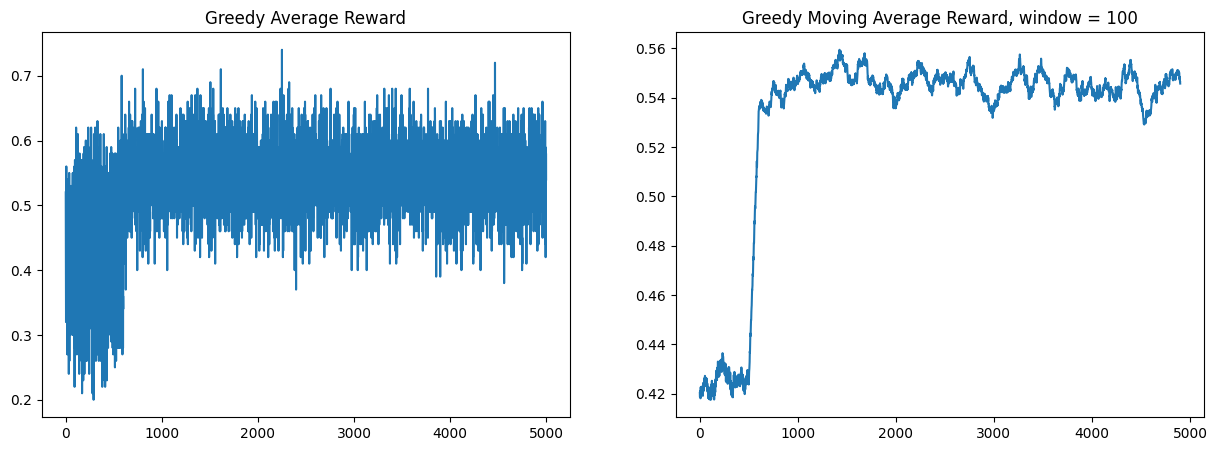

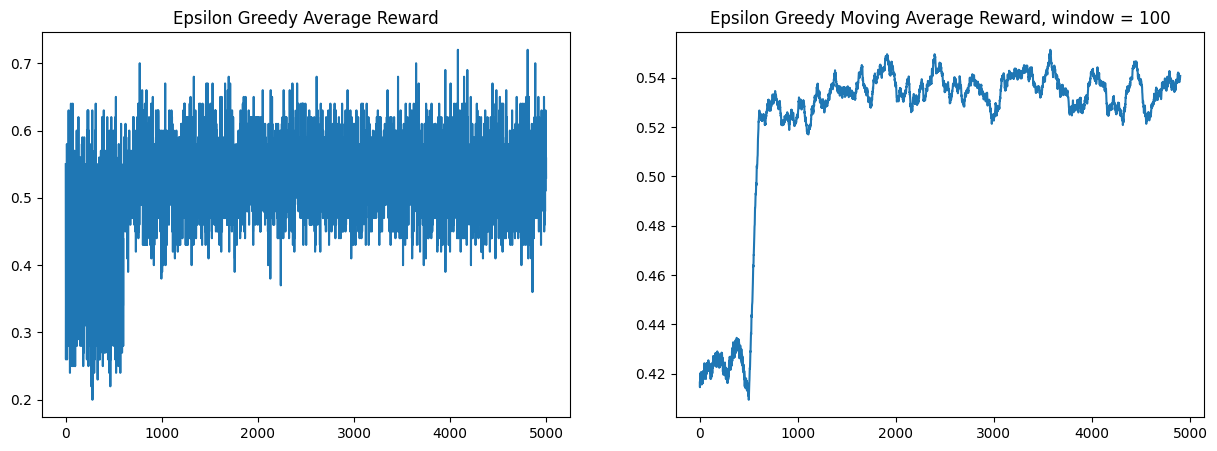

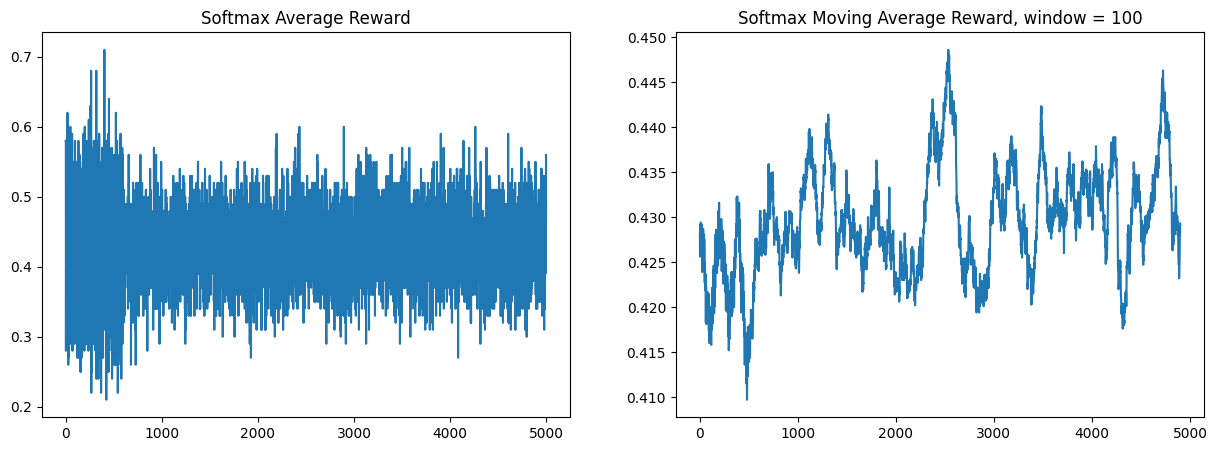

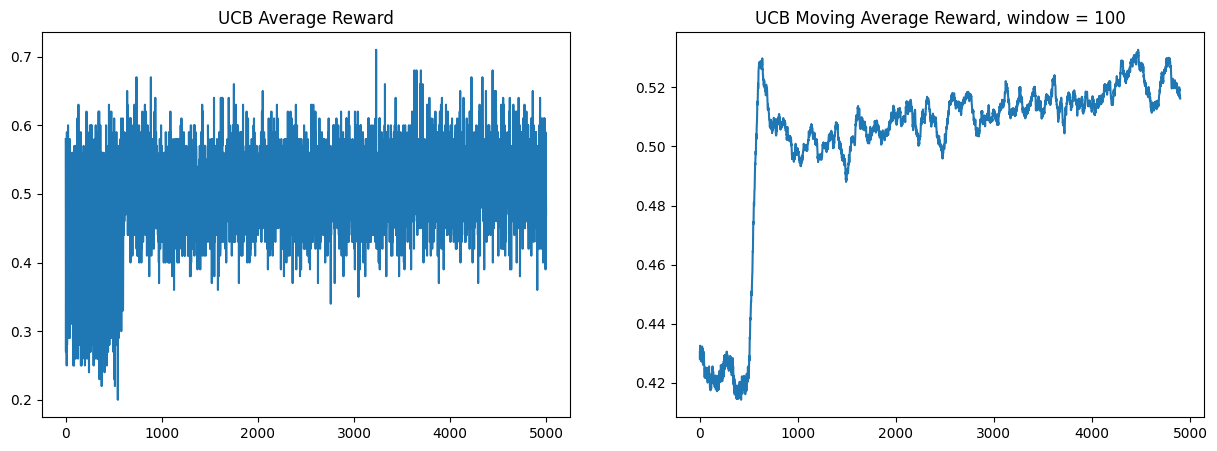

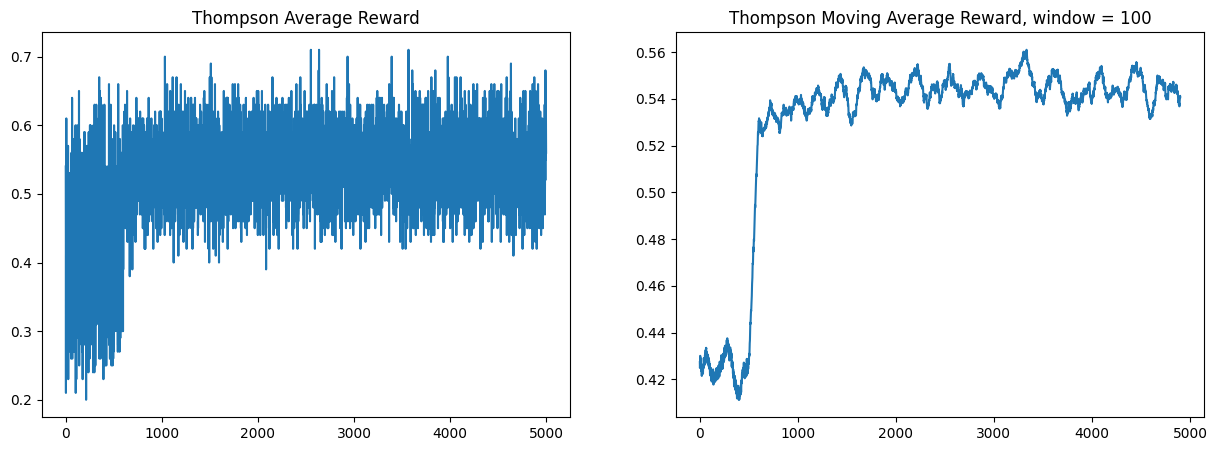

In [54]:
def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].plot(np.mean(greedyRewards, axis = 1))
ax[1].plot(moving_average(np.mean(greedyRewards, axis = 1), n = 100))
ax[0].set_title('Greedy Average Reward')
ax[1].set_title('Greedy Moving Average Reward, window = 100')

fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].plot(np.mean(epsilonGreedyRewards, axis = 1))
ax[1].plot(moving_average(np.mean(epsilonGreedyRewards, axis = 1), n = 100))
ax[0].set_title('Epsilon Greedy Average Reward')
ax[1].set_title('Epsilon Greedy Moving Average Reward, window = 100')

fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].plot(np.mean(softmaxRewards, axis = 1))
ax[1].plot(moving_average(np.mean(softmaxRewards, axis = 1), n = 100))
ax[0].set_title('Softmax Average Reward')
ax[1].set_title('Softmax Moving Average Reward, window = 100')

fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].plot(np.mean(ucbRewards, axis = 1))
ax[1].plot(moving_average(np.mean(ucbRewards, axis = 1), n = 100))
ax[0].set_title('UCB Average Reward')
ax[1].set_title('UCB Moving Average Reward, window = 100')

fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].plot(np.mean(thompsonRewards, axis = 1))
ax[1].plot(moving_average(np.mean(thompsonRewards, axis = 1), n = 100))
ax[0].set_title('Thompson Average Reward')
ax[1].set_title('Thompson Moving Average Reward, window = 100')